In [1]:
import yfinance as yf
import pandas as pd

# Download financial data for Etsy (ETSY)
ticker = "ETSY"
stock = yf.Ticker(ticker)
financials = stock.financials
cash_flow = stock.cashflow
balance_sheet = stock.balance_sheet


print(financials)

                                                      2024-12-31  \
Tax Effect Of Unusual Items                            3508442.0   
Tax Rate For Calcs                                         0.262   
Normalized EBITDA                                    519264000.0   
Total Unusual Items                                   13391000.0   
Total Unusual Items Excluding Goodwill                13391000.0   
Net Income From Continuing Operation Net Minori...   303281000.0   
Reconciled Depreciation                              108074000.0   
Reconciled Cost Of Revenue                           774554000.0   
EBITDA                                               532655000.0   
EBIT                                                 424581000.0   
Net Interest Income                                   17176000.0   
Interest Expense                                      13806000.0   
Interest Income                                       30982000.0   
Normalized Income                               

In [2]:
def dcf_valuation(fcf, growth_rate, discount_rate, terminal_growth_rate):
    """
    Perform DCF valuation.
    :param fcf: List of free cash flows for the next 5 years.
    :param growth_rate: Assumed growth rate for FCF.
    :param discount_rate: Discount rate (WACC).
    :param terminal_growth_rate: Terminal growth rate.
    :return: Intrinsic value of the stock.
    """
    # Forecast FCF for the next 5 years
    forecasted_fcf = [fcf * (1 + growth_rate) ** i for i in range(1, 6)]

    # Calculate Terminal Value
    terminal_value = forecasted_fcf[-1] * (1 + terminal_growth_rate) / (discount_rate - terminal_growth_rate)

    # Discount FCF and Terminal Value
    discounted_fcf = [fcf / (1 + discount_rate) ** i for i, fcf in enumerate(forecasted_fcf, 1)]
    discounted_terminal_value = terminal_value / (1 + discount_rate) ** 5

    # Calculate Intrinsic Value
    intrinsic_value = sum(discounted_fcf) + discounted_terminal_value
    return intrinsic_value

# Example inputs
fcf = 500_000_000  # Free Cash Flow in USD
growth_rate = 0.05  # 5% growth rate
discount_rate = 0.08  # 8% discount rate
terminal_growth_rate = 0.02  # 2% terminal growth rate

intrinsic_value = dcf_valuation(fcf, growth_rate, discount_rate, terminal_growth_rate)
print(f"Intrinsic Value: ${intrinsic_value:,.2f}")

Intrinsic Value: $9,682,457,924.91


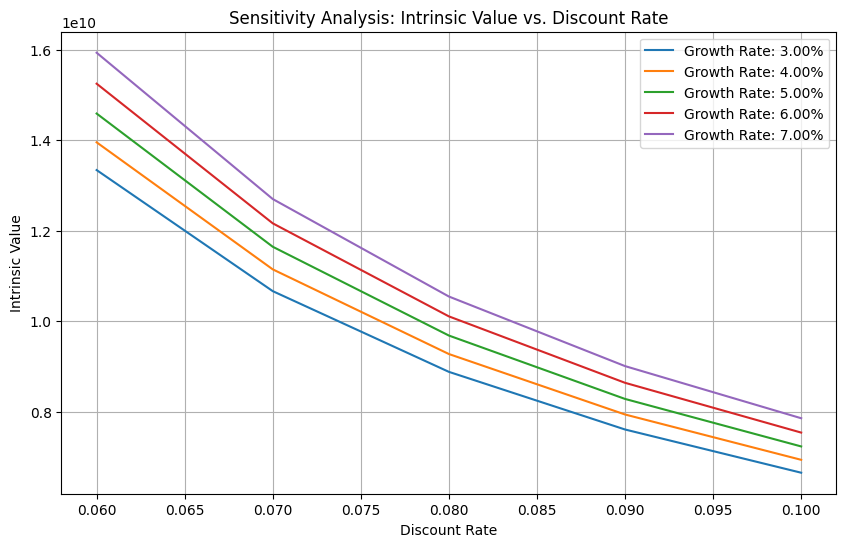

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define ranges for sensitivity analysis
growth_rates = np.linspace(0.03, 0.07, 5)  # Growth rates from 3% to 7%
discount_rates = np.linspace(0.06, 0.10, 5)  # Discount rates from 6% to 10%

# Create a grid for sensitivity analysis
intrinsic_values = np.zeros((len(growth_rates), len(discount_rates)))
for i, gr in enumerate(growth_rates):
    for j, dr in enumerate(discount_rates):
        intrinsic_values[i, j] = dcf_valuation(fcf, gr, dr, terminal_growth_rate)

# Plot the results
plt.figure(figsize=(10, 6))
for i, gr in enumerate(growth_rates):
    plt.plot(discount_rates, intrinsic_values[i, :], label=f"Growth Rate: {gr:.2%}")
plt.xlabel("Discount Rate")
plt.ylabel("Intrinsic Value")
plt.title("Sensitivity Analysis: Intrinsic Value vs. Discount Rate")
plt.legend()
plt.grid()
plt.show()

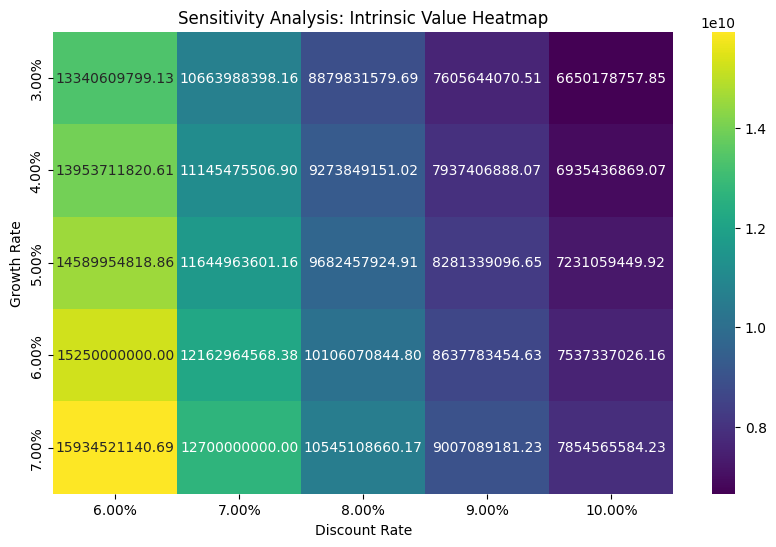

In [4]:
import seaborn as sns

# sensitivity analysis
plt.figure(figsize=(10, 6))
sns.heatmap(intrinsic_values, annot=True, fmt=".2f", xticklabels=[f"{dr:.2%}" for dr in discount_rates],
            yticklabels=[f"{gr:.2%}" for gr in growth_rates], cmap="viridis")
plt.xlabel("Discount Rate")
plt.ylabel("Growth Rate")
plt.title("Sensitivity Analysis: Intrinsic Value Heatmap")
plt.show()